### About the Dataset:
This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

### Key Features:
* track_name: Name of the song
* artist(s)_name: Name of the artist(s) of the song
* artist_count: Number of artists contributing to the song
* released_year: Year when the song was released
* released_month: Month when the song was released
* released_day: Day of the month when the song was released
* in_spotify_playlists: Number of Spotify playlists the song is included in
* in_spotify_charts: Presence and rank of the song on Spotify charts
* streams: Total number of streams on Spotify
* in_apple_playlists: Number of Apple Music playlists the song is included in
* in_apple_charts: Presence and rank of the song on Apple Music charts
* in_deezer_playlists: Number of Deezer playlists the song is included in
* in_deezer_charts: Presence and rank of the song on Deezer charts
* in_shazam_charts: Presence and rank of the song on Shazam charts
* bpm: Beats per minute, a measure of song tempo
* key: Key of the song
* mode: Mode of the song (major or minor)
* danceability_%: Percentage indicating how suitable the song is for dancing
* valence_%: Positivity of the song's musical content
* energy_%: Perceived energy level of the song
* acousticness_%: Amount of acoustic sound in the song
* instrumentalness_%: Amount of instrumental content in the song
* liveness_%: Presence of live performance elements
* speechiness_%: Amount of spoken words in the song

## Data Collection and Preprocessing

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [ ]:
# Get number of null cell on each column/feature
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

There are null data in the dataset. We are not going to drop the rows yet.

In [ ]:
# df.dropna(inplace=True)
# df.info()

In [ ]:
#Get statistical data for all numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


In [ ]:
#Get statistical data for all categorical features
df.describe(include=['O']).T

,count,unique,top,freq
track_name,953,943,Daylight,2
artist(s)_name,953,645,Taylor Swift,34
streams,953,949,723894473,2
in_deezer_playlists,953,348,0,24
in_shazam_charts,903,198,0,344
key,858,11,C#,120
mode,953,2,Major,550


### Numerical Features

*streams*, *in_deezer_playlists*, and *in_shazam_charts* columns are included in the statistics for categorical features.
* *streams* - totoal number of streams on Spotify
* *in_deezer_playlists* - the number of deezer playlists the song is included in
* in_shazam_charts - presence and rank of the song in shazam charts

These following features described should be a numerical features.

Let's further investigate on these features.

In [ ]:
#Get non-numeric values in the stream feature
df.loc[df.streams.str.isnumeric() == False]['streams']

574    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, dtype: object

In [ ]:
#Get non-numeric values in the in_deezer_playlists feature
df.loc[df.in_deezer_playlists.str.isnumeric() == False]['in_deezer_playlists']

48     2,445
54     3,394
55     3,421
65     4,053
73     1,056
       ...  
761    2,453
762    2,430
871    6,720
893    1,315
910    7,827
Name: in_deezer_playlists, Length: 79, dtype: object

In [ ]:
#Get non-numeric values in the in_shazam_charts feature
df.loc[df.in_shazam_charts.str.isnumeric() == False]['in_shazam_charts']

12    1,021
13    1,281
17    1,173
24    1,093
44    1,133
88    1,451
89    1,170
Name: in_shazam_charts, dtype: object

There are data in string format. stream feature contains a long string of characters which is not valuable and should be removed. The other features, however have valuable data that are represented in string format. There is a need to transform these into numerical data.

In [ ]:
#removing non-numeric row in stream feature
to_drop = df.loc[df.streams.str.isnumeric() == False]['streams'].index
df.drop(to_drop, inplace=True)

In [ ]:
#removing commas
transform_cols = ["in_deezer_playlists", "in_shazam_charts"]
for col in transform_cols:
    df[col] = df[col].replace(',','', regex=True)

In [ ]:
#convert columns to numerical feature
convert_cols = ["streams", "in_deezer_playlists", "in_shazam_charts"]
for col in convert_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df[["streams", "in_deezer_playlists","in_shazam_charts"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   streams              952 non-null    int64  
 1   in_deezer_playlists  952 non-null    int64  
 2   in_shazam_charts     902 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 29.8 KB


The features are converted to numerical data. They can be used to describe now.

In [ ]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,902.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,385.535714,2.669118,60.062084,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,1131.078760,6.038152,161.238101,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,13.000000,0.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,44.000000,0.000000,2.500000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,164.250000,2.000000,37.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


### Categorical Features

Let's take a look on categorical features.

In [ ]:
df.select_dtypes(include=['object'])

,track_name,artist(s)_name,key,mode
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",B,Major
1,LALA,Myke Towers,C#,Major
2,vampire,Olivia Rodrigo,F,Major
3,Cruel Summer,Taylor Swift,A,Major
4,WHERE SHE GOES,Bad Bunny,A,Minor
...,...,...,...,...
948,My Mind & Me,Selena Gomez,A,Major
949,Bigger Than The Whole Sky,Taylor Swift,F#,Major
950,A Veces (feat. Feid),"Feid, Paulo Londra",C#,Major
951,En La De Ella,"Feid, Sech, Jhayco",C#,Major


In [ ]:
# df.select_dtypes(include=['object']).isna().sum()

In [ ]:
df[df.artist_count > 1]['artist(s)_name']

0                 Latto, Jung Kook
5                Dave, Central Cee
6       Eslabon Armado, Peso Pluma
9            Peso Pluma, Yng Lvcas
10       Bad Bunny, Grupo Frontera
                  ...             
942    Ludwig Goransson, Foudeqush
943               Drake, 21 Savage
946               Drake, 21 Savage
950             Feid, Paulo Londra
951             Feid, Sech, Jhayco
Name: artist(s)_name, Length: 366, dtype: object

The artist(s)_name feature includes multiple artist in one track. This is also indicated in the artist_count feature. Let's split the multiple artists and create a row per artist so we can analyze per artist.

In [ ]:
#Split by comma and turn to a list
df['artist(s)_name'] = df['artist(s)_name'].str.split(',')

In [ ]:
# Each value has been separated out and the column has a list of artists
df['artist(s)_name']

0         [Latto,  Jung Kook]
1               [Myke Towers]
2            [Olivia Rodrigo]
3              [Taylor Swift]
4                 [Bad Bunny]
                ...          
948            [Selena Gomez]
949            [Taylor Swift]
950     [Feid,  Paulo Londra]
951    [Feid,  Sech,  Jhayco]
952               [Burna Boy]
Name: artist(s)_name, Length: 952, dtype: object

In [ ]:
# Convert list into multiple rows so each artist has a separate row with their track
# Let's also reset index so each row has is separated out
df = df.explode('artist(s)_name').reset_index(drop=True)
df['artist(s)_name'] = df['artist(s)_name'].str.strip()
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,Seven (feat. Latto) (Explicit Ver.),Jung Kook,2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
2,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
3,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
4,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,A Veces (feat. Feid),Paulo Londra,2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
1477,En La De Ella,Feid,3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
1478,En La De Ella,Sech,3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
1479,En La De Ella,Jhayco,3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [ ]:
# We no longer need the artist_count so we can drop the column.
df.drop('artist_count',axis=1,inplace=True)

In [ ]:
# We can also rename the artist(s)_name column since there is only a single artist for each track now.
df.rename(columns={'artist(s)_name':'artist_name'}, inplace=True)

Let's look for duplicated rows after exploding the dataframe. We can drop these duplicates so analysis after are more accurate.

In [ ]:
df[df.duplicated(keep=False)]

,track_name,artist_name,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
328,Area Codes,Kaliii,2023,3,17,1197,13,113509496,44,34,...,155,C#,Major,82,51,39,2,0,9,49
329,Area Codes,Kaliii,2023,3,17,1197,13,113509496,44,34,...,155,C#,Major,82,51,39,2,0,9,49
777,Fingers Crossed,Lauren Spencer Smith,2022,1,5,2235,0,349585590,65,7,...,109,F,Major,60,45,47,62,0,31,5
778,Fingers Crossed,Lauren Spencer Smith,2022,1,5,2235,0,349585590,65,7,...,109,F,Major,60,45,47,62,0,31,5
779,Fingers Crossed,Lauren Spencer Smith,2022,1,5,2235,0,349585590,65,7,...,109,F,Major,60,45,47,62,0,31,5


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(1478, 23)

## Data Visualization and Analysis

Let's try to plot the features and find useful relationship between them.

In [ ]:
# Numerical Features:
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()
print('The numerical features in the Spotify Dataset are:')
print(numerical_features)

# Categorical Features:

categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print('\nThe Categorical features in the Spotify Dataset are:')
print(categorical_features)

The numerical features in the Spotify Dataset are:
['released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

The Categorical features in the Spotify Dataset are:
['track_name', 'artist_name', 'key', 'mode']


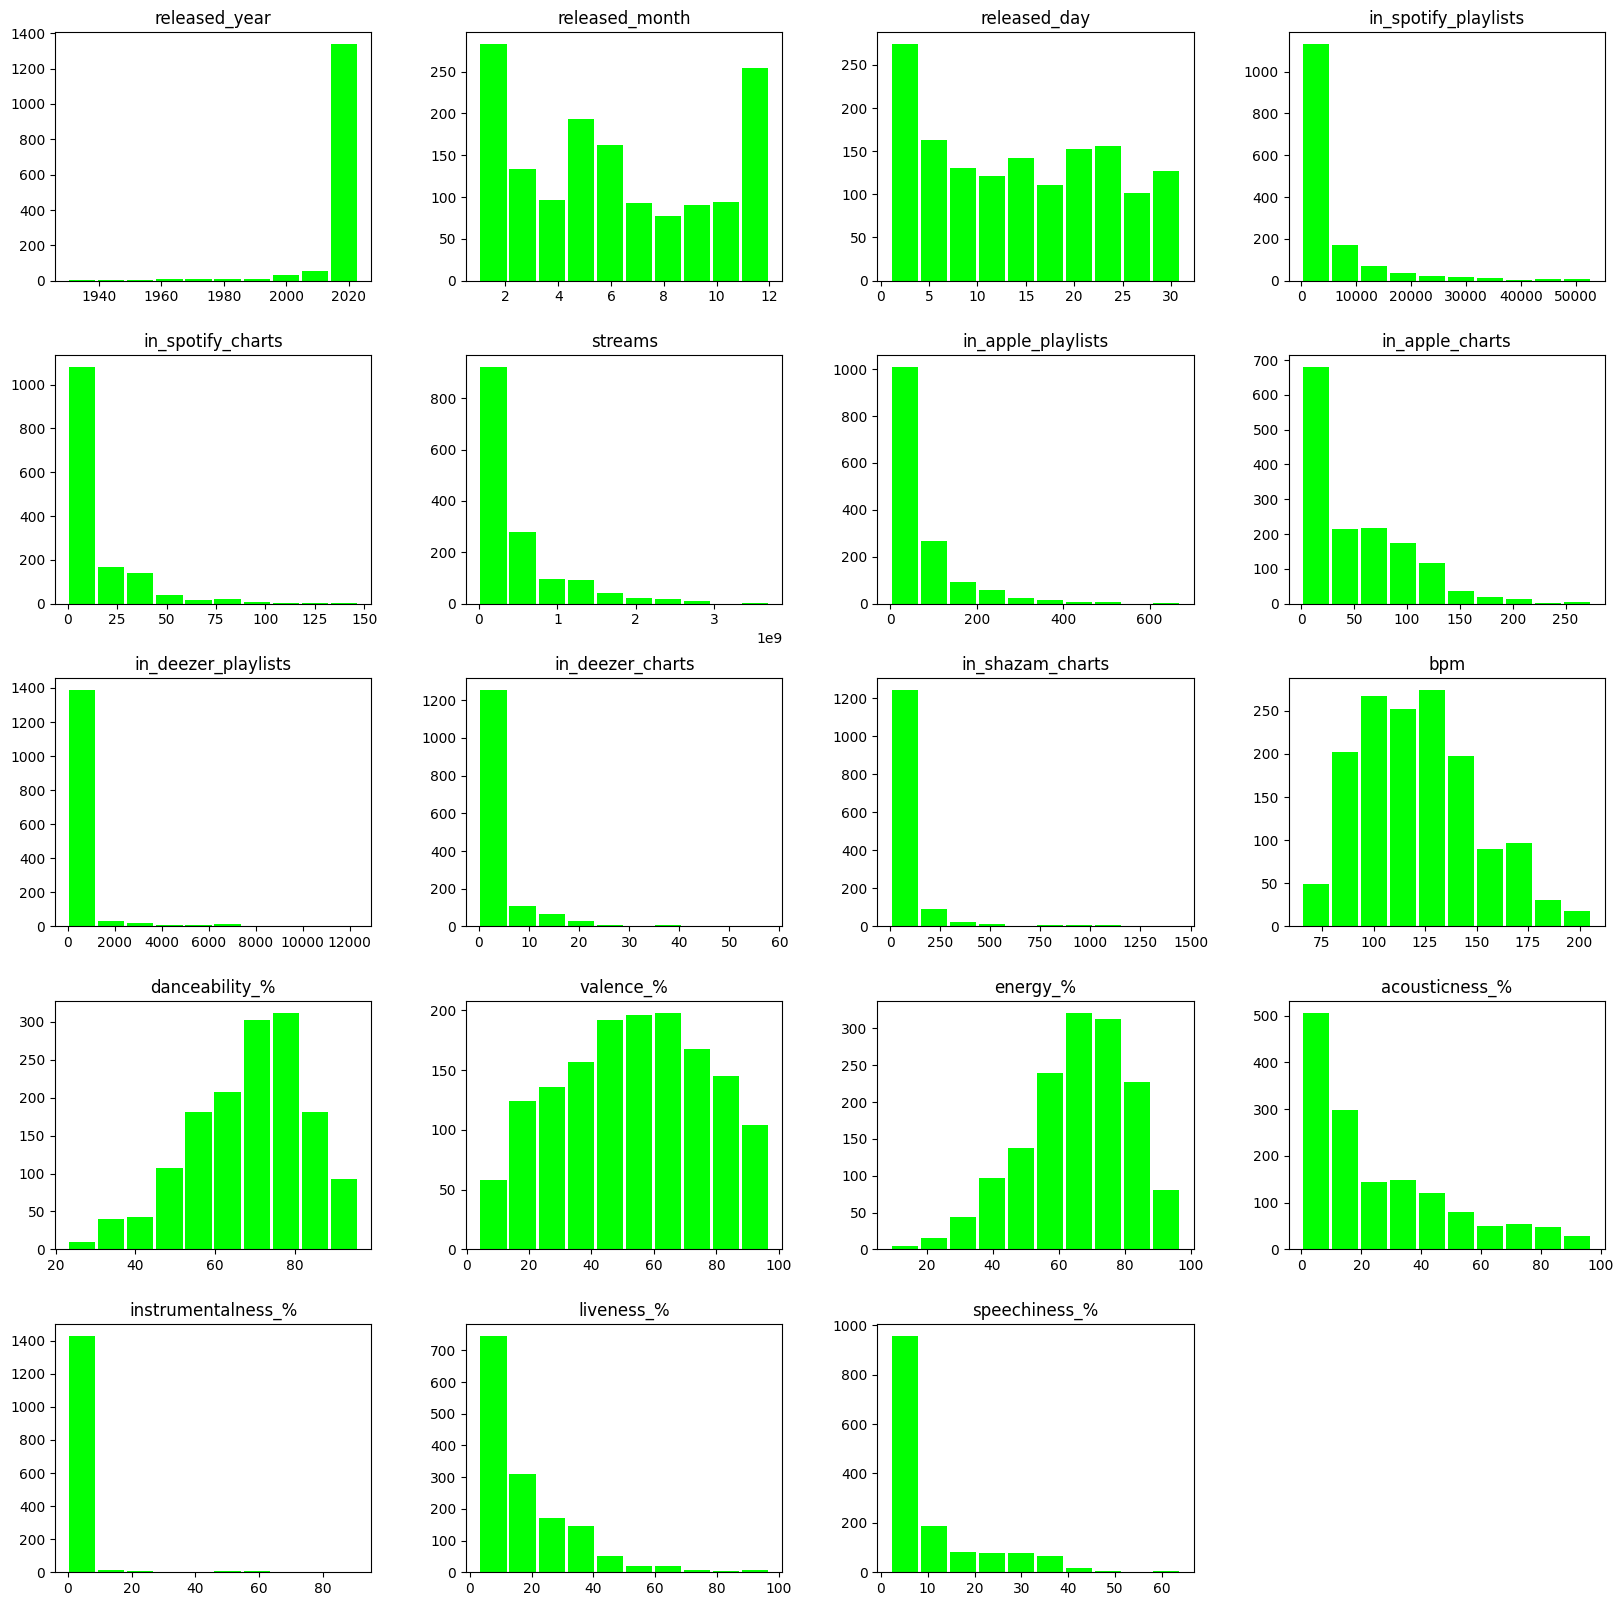

In [ ]:
df.hist(column=df.columns,
              color='lime',
              figsize=(20,20), #(x axis and y axis in inches)
              bins=10, # number of bins to divide the data into
              rwidth=0.9, # width between each bin
              grid=False # to remove the grid for cleaner visualization
       )
plt.show()

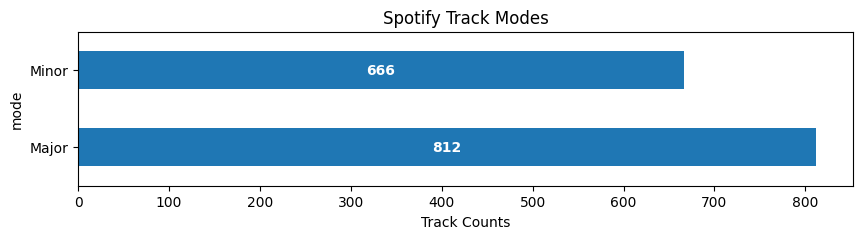

In [ ]:
# Let's look at the break up of column 'mode' in the dataset

ax = df['mode'].value_counts().plot(kind='barh', figsize=(10,2), grid=False)
ax.bar_label(ax.containers[0], label_type='center', color='white', weight='bold')
plt.title('Spotify Track Modes')
plt.yticks([0,1],['Major', 'Minor'])
plt.xlabel('Track Counts')
plt.show()

Most of the top tracks are in Major mode. This is expected as for the previous histogram, most songs are leaning to the right on the following audio features:
* danceability_%: Percentage indicating how suitable the song is for dancing
* valence_%: Positivity of the song's musical content
* energy_%: Perceived energy level of the song

High percentage on these audio features are in spectrum of Major mode (light, bright, and cheerier sounds).

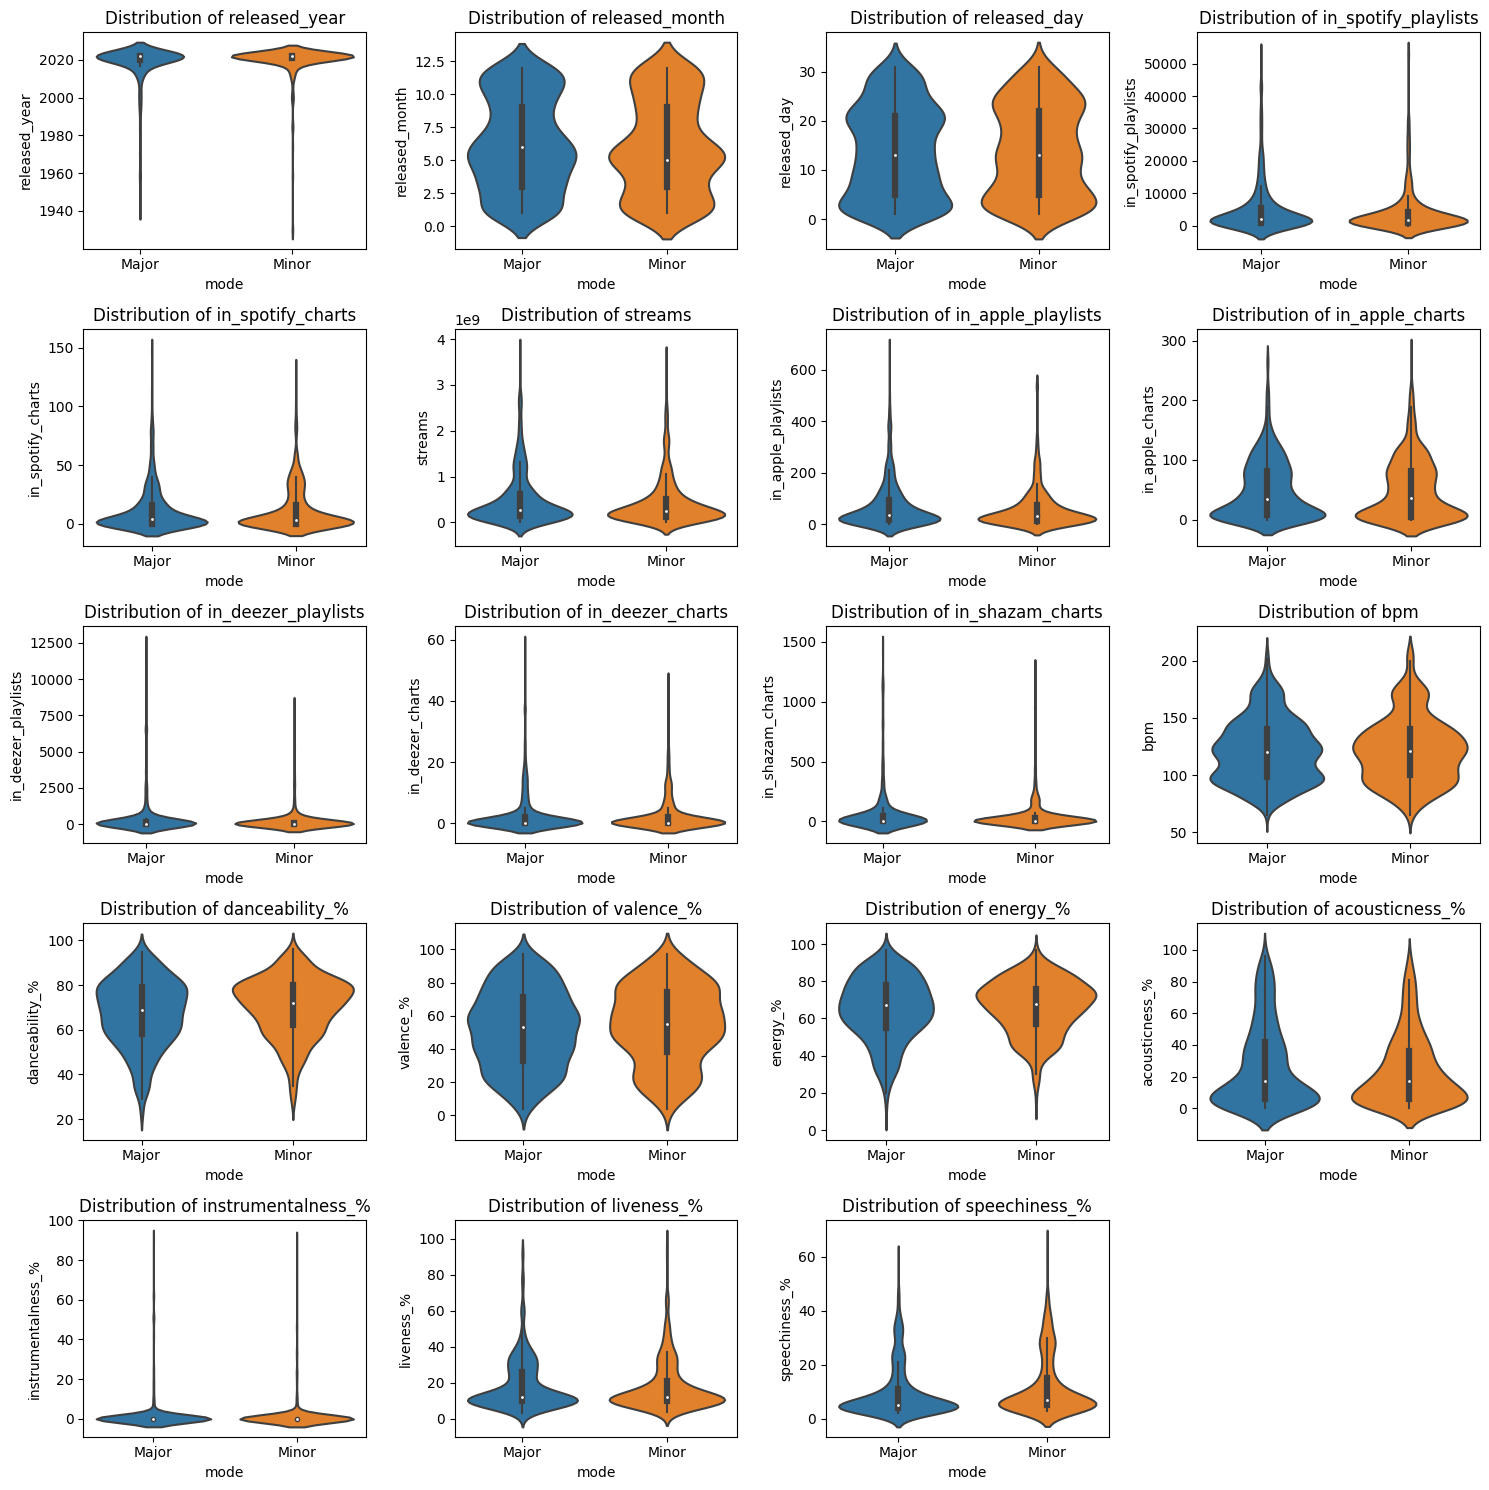

In [ ]:
n_features = list(numerical_features)

plt.figure(figsize=(15,15))
for i,col in enumerate(nfeatures,1):
    plt.subplot(5,4,i)
    plt.title(f"Distribution of {col}")
    sns.violinplot(data=df, x='mode', y=df[col])
    plt.tight_layout()
    plt.plot()

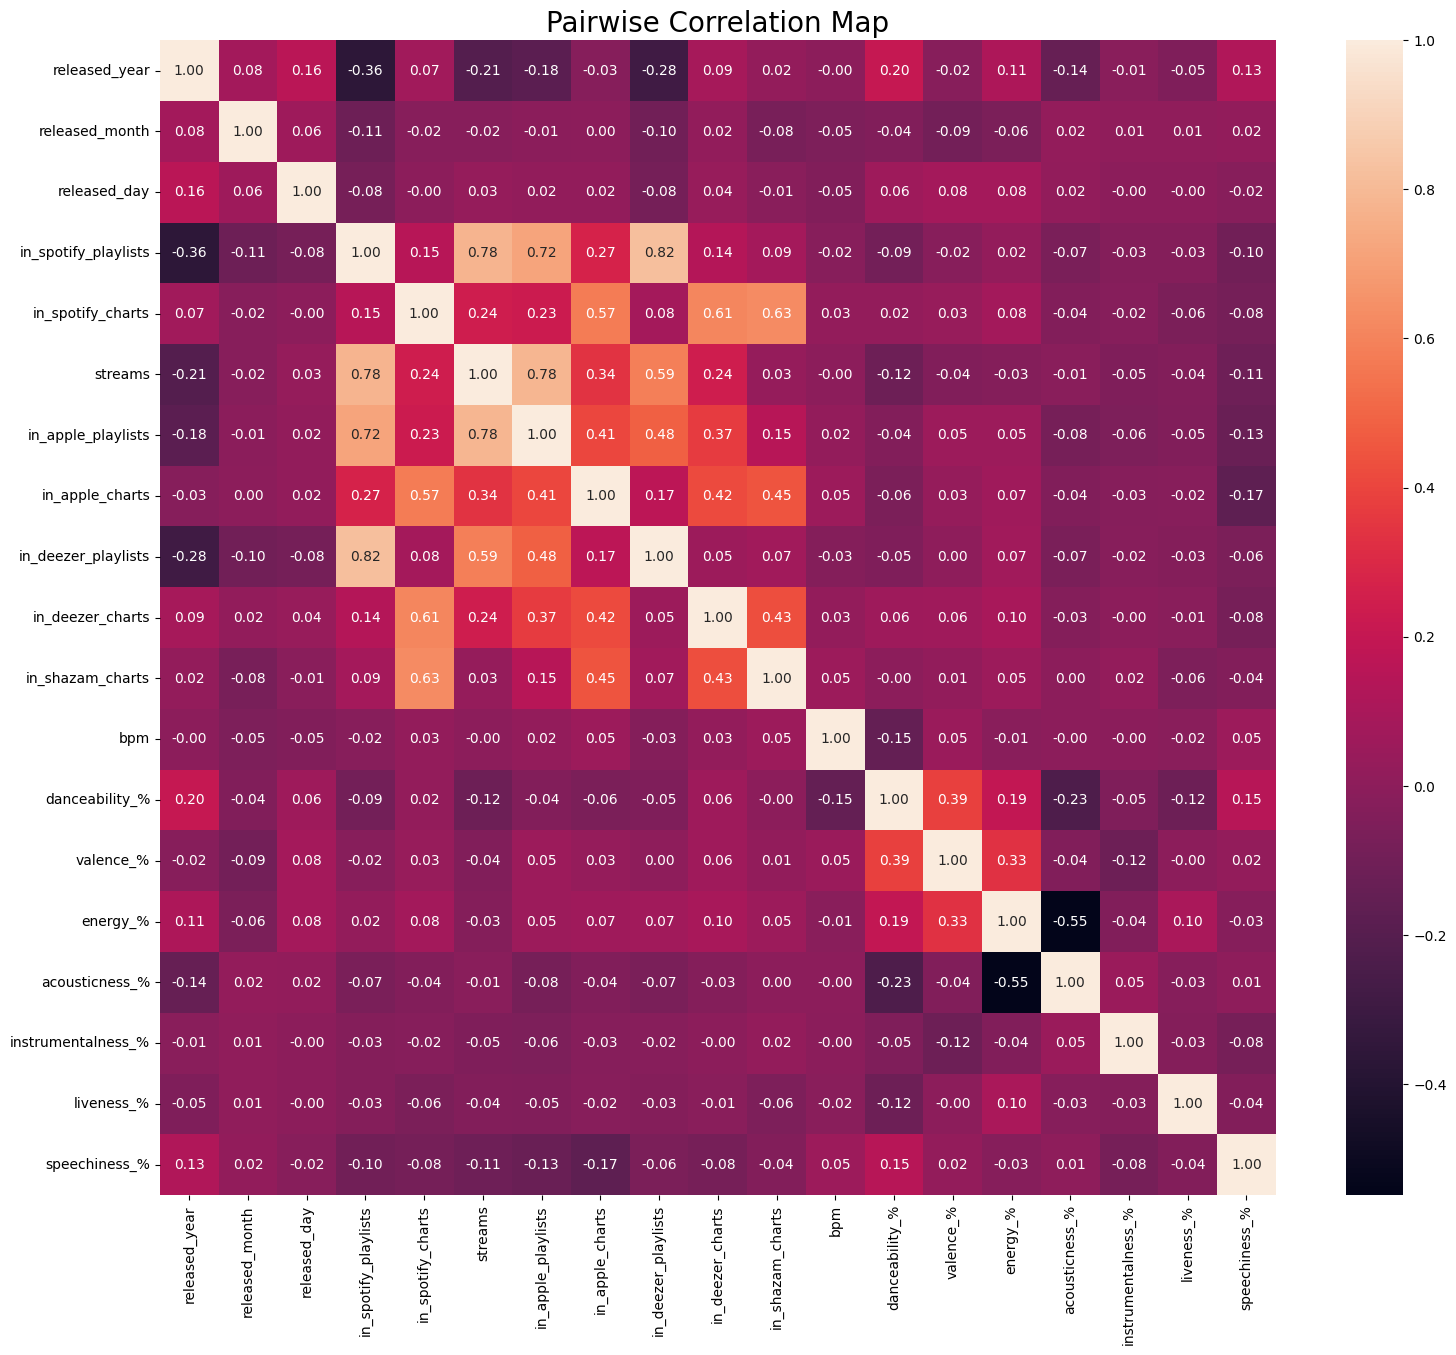

In [ ]:
plt.figure(figsize=(18,15))

# Let's do a heatmap correlation of the whole dataframe and use 2 decimal places for the correlation ratio
sns.heatmap(df.corr(numeric_only = True),annot=True,fmt='.2f')

# Let's give it a title
plt.title('Pairwise Correlation Map', size = 20)

# Finally, plot the heatmap
plt.show()

This shows a strong correlation between some of the columns.

positive correlation:

* streams and in_spotify_playlist
* streams and in_apple_playlist
* danceability% and valence%
* danceability% and energy%

negative correlation:

* released_year and in_spotify_playlist
* released_year and in_deezer_playlists
* acousticness% and energy%

### Top 20 tracks
Let's explore the 20 most streamed tracks on Spotify

In [ ]:
top_20_track = df[['track_name', 'artist_name','streams']].drop_duplicates(keep='first').sort_values(by='streams', ascending=False).head(20)

df[['track_name', 'streams']].drop_duplicates(keep='first').sort_values(by='streams', ascending=False).head(20)

,track_name,streams
93,Blinding Lights,3703895074
280,Shape of You,3562543890
138,Someone You Loved,2887241814
968,Dance Monkey,2864791672
67,Sunflower - Spider-Man: Into the Spider-Verse,2808096550
258,One Dance,2713922350
134,STAY (with Justin Bieber),2665343922
222,Believer,2594040133
1135,Closer,2591224264
80,Starboy,2565529693


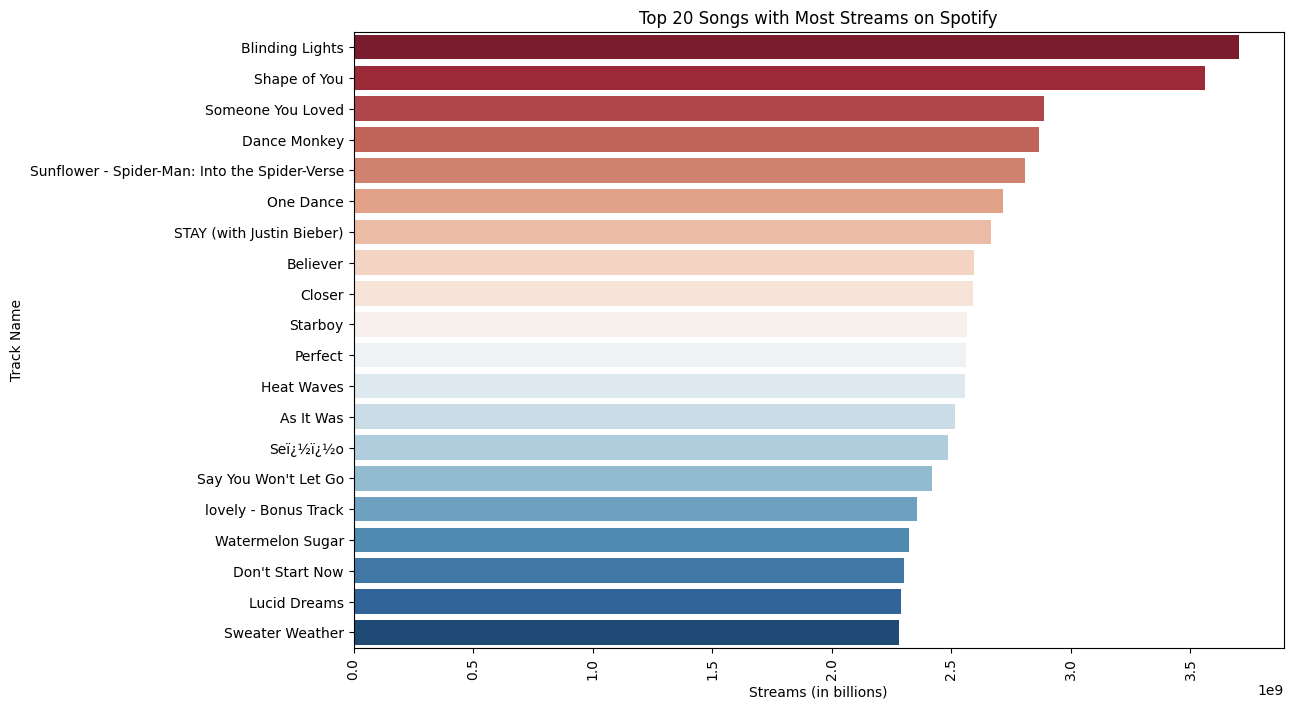

In [ ]:
# Plot the top 20 most streamed tracks
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_track['streams'], y=top_20_track['track_name'], palette='RdBu')
plt.xlabel('Streams (in billions)')
plt.ylabel('Track Name')
plt.title('Top 20 Songs with Most Streams on Spotify')
plt.xticks(rotation=90)
plt.show()

### Top 20 artists
Let's explore the 20 most streamed artists on Spotify

In [ ]:
top_20_artist = df.groupby(["artist_name"]).streams.sum().reset_index().sort_values(by='streams', ascending=False).head(20)
top_20_artist.head(20)

,artist_name,streams
628,The Weeknd,23929760757
67,Bad Bunny,23813527270
186,Ed Sheeran,15316587718
608,Taylor Swift,14630378183
245,Harry Styles,11608645649
197,Eminem,10193727260
182,Dua Lipa,9980020481
300,Justin Bieber,8243081039
181,Drake,8043031261
61,BTS,7780428159


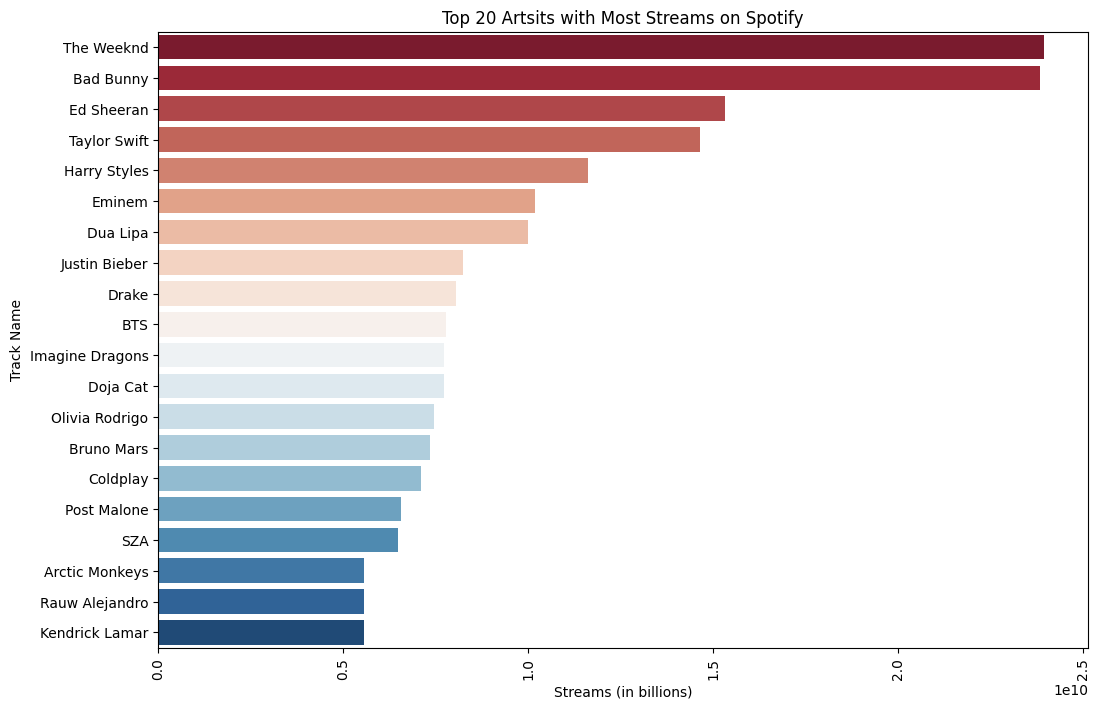

In [ ]:
# Plot the top 20 most streamed artists
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_artist['streams'], y=top_20_artist['artist_name'], palette='RdBu')
plt.xlabel('Streams (in billions)')
plt.ylabel('Track Name')
plt.title('Top 20 Artsits with Most Streams on Spotify')
plt.xticks(rotation=90)
plt.show()

### Top 20 tracks in spotify charts
Let's explore the 20 most tracks in Spotify charts.

In [ ]:
top_20_in_spotify_charts = df[['track_name', 'in_spotify_charts']].drop_duplicates(keep='first').sort_values(by='in_spotify_charts', ascending=False).head(20)
top_20_in_spotify_charts

,track_name,in_spotify_charts
0,Seven (feat. Latto) (Explicit Ver.),147
19,As It Was,130
17,Flowers,115
3,vampire,113
30,I Wanna Be Yours,110
22,What Was I Made For? [From The Motion Picture ...,104
42,Dance The Night (From Barbie The Album),101
4,Cruel Summer,100
18,Daylight,98
6,Sprinter,91


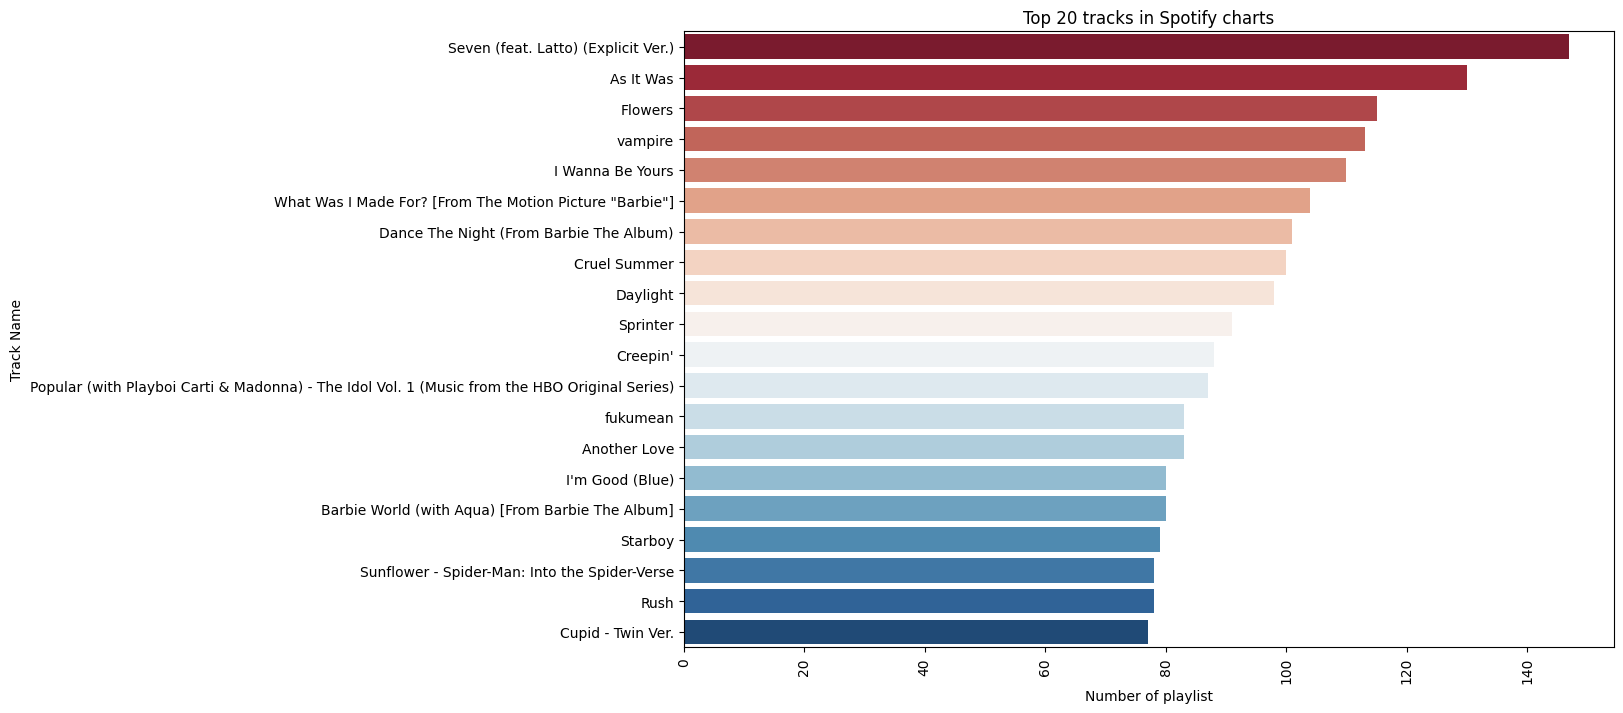

In [ ]:
# Plot the top 20 tracks in Spotify charts
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_in_spotify_charts['in_spotify_charts'], y=top_20_in_spotify_charts['track_name'], palette='RdBu')
plt.xlabel('Number of playlist')
plt.ylabel('Track Name')
plt.title('Top 20 tracks in Spotify charts')
plt.xticks(rotation=90)
plt.show()

### Top 20 tracks in Spotify playlists
Let's look on the 20 most tracks that are in Spotify playlist

In [ ]:
top_20_in_spotify_playlist = df[['track_name', 'in_spotify_playlists']].drop_duplicates(keep='first').sort_values(by='in_spotify_playlists', ascending=False).head(20)
top_20_in_spotify_playlist

,track_name,in_spotify_playlists
1185,Get Lucky - Radio Edit,52898
982,Mr. Brightside,51979
1129,Wake Me Up - Radio Edit,50887
973,Smells Like Teen Spirit - Remastered 2021,49991
305,Take On Me,44927
93,Blinding Lights,43899
258,One Dance,43257
1138,Somebody That I Used To Know,42798
176,Everybody Wants To Rule The World,41751
1352,Sweet Child O' Mine,41231


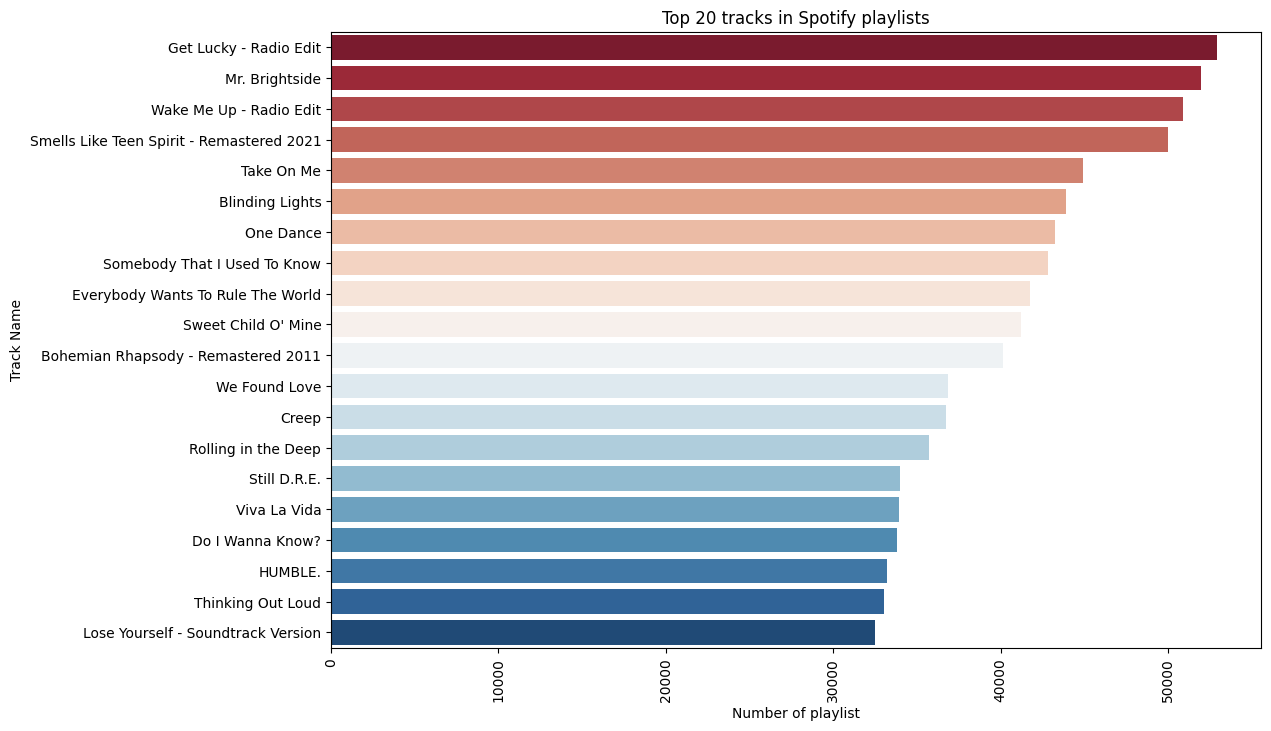

In [ ]:
# Plot the top 20 tracks in Spodtify playlists
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_in_spotify_playlist['in_spotify_playlists'], y=top_20_in_spotify_playlist['track_name'], palette='RdBu')
plt.xlabel('Number of playlist')
plt.ylabel('Track Name')
plt.title('Top 20 tracks in Spotify playlists')
plt.xticks(rotation=90)
plt.show()

### Tracks on each month
Let's look on the number of tracks released each month.

In [ ]:
df.groupby("released_month")["released_month"].count()

released_month
1     186
2      97
3     133
4      97
5     194
6     162
7      93
8      77
9      90
10     94
11    130
12    125
Name: released_month, dtype: int64

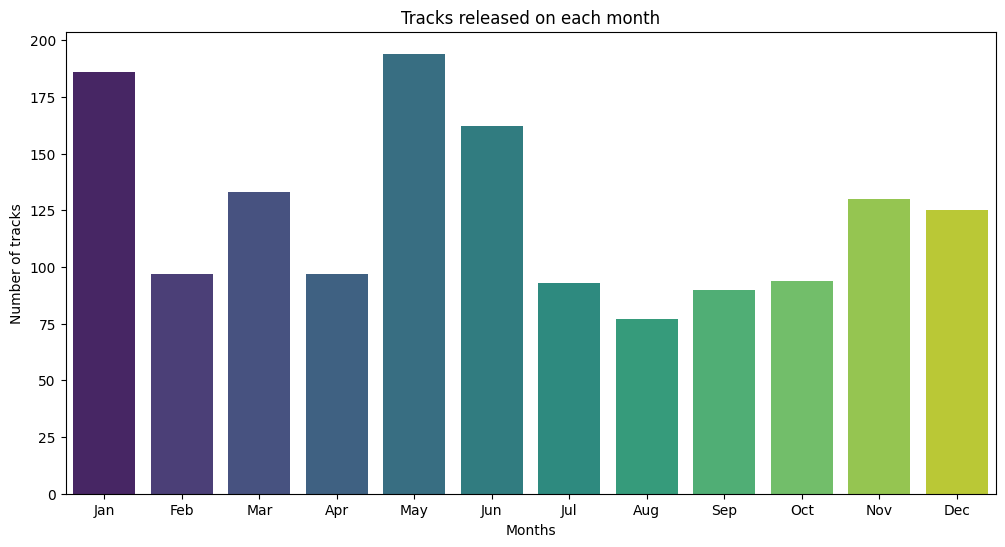

In [ ]:
# Plot the number of tracks released each month
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct","Nov","Dec"]
x = pd.Series(months)
y = df.groupby("released_month")["released_month"].count().tolist()

plt.figure(figsize=(12, 6))
sns.barplot(x=x, y=y, palette='viridis')
plt.xlabel('Months')
plt.ylabel('Number of tracks')
plt.title('Tracks released on each month')
plt.xticks(rotation=0)
plt.show()

The month with most released songs is May followed by January, then Jun. This might be caused by season of the year. For, instance, the months of May and June are when school is out and people is focused on summer. Hence, songs that are light, upbeat and good-feels songs are perfect in these months. This links back to the mode of most of the top songs which is Major.

### Top 20 tracks vs Top 20 artists
Let's see the Top 20 tracks if they are performed by the Top 20 aristis.

In [ ]:
pd.merge(top_20_track, top_20_artist, on="artist_name", how="inner").rename(columns={"streams_x": "Track streams", "streams_y": "Artist streams"})

,track_name,artist_name,Track streams,Artist streams
0,Blinding Lights,The Weeknd,3703895074,23929760757
1,Shape of You,Ed Sheeran,3562543890,15316587718
2,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2808096550,6548593678
3,One Dance,Drake,2713922350,8043031261
4,STAY (with Justin Bieber),Justin Bieber,2665343922,8243081039
5,Believer,Imagine Dragons,2594040133,7719446948
6,Starboy,The Weeknd,2565529693,23929760757
7,Perfect,Ed Sheeran,2559529074,15316587718
8,As It Was,Harry Styles,2513188493,11608645649


We can see that eight tracks from Top 20 tracks are performed by Top 20 streamed artist.

### Top 20 tracks vs Top 20 tracks in Spotify playlist
Let's examine the top 20 most streamed tracks if they are among the tracks that are in **Top 20 tracks in Spotify playlists**.

In [ ]:
pd.merge(top_20_track, top_20_in_spotify_playlist, on="track_name", how="inner")

,track_name,streams,in_spotify_playlists
0,Blinding Lights,3703895074,43899
1,One Dance,2713922350,43257


We can see that only two tracks, Blinding Light and One Dance, are in the **Top 20 tracks** that are in the **Top 20 tracks in Spotify playlist**.

From here, we can say that top streamed songs is not necessarily a song that frequently included in a playlist.

### Streams vs In Spotify Playlists vs In Spotify Charts

Let's see the correlation between the three features.

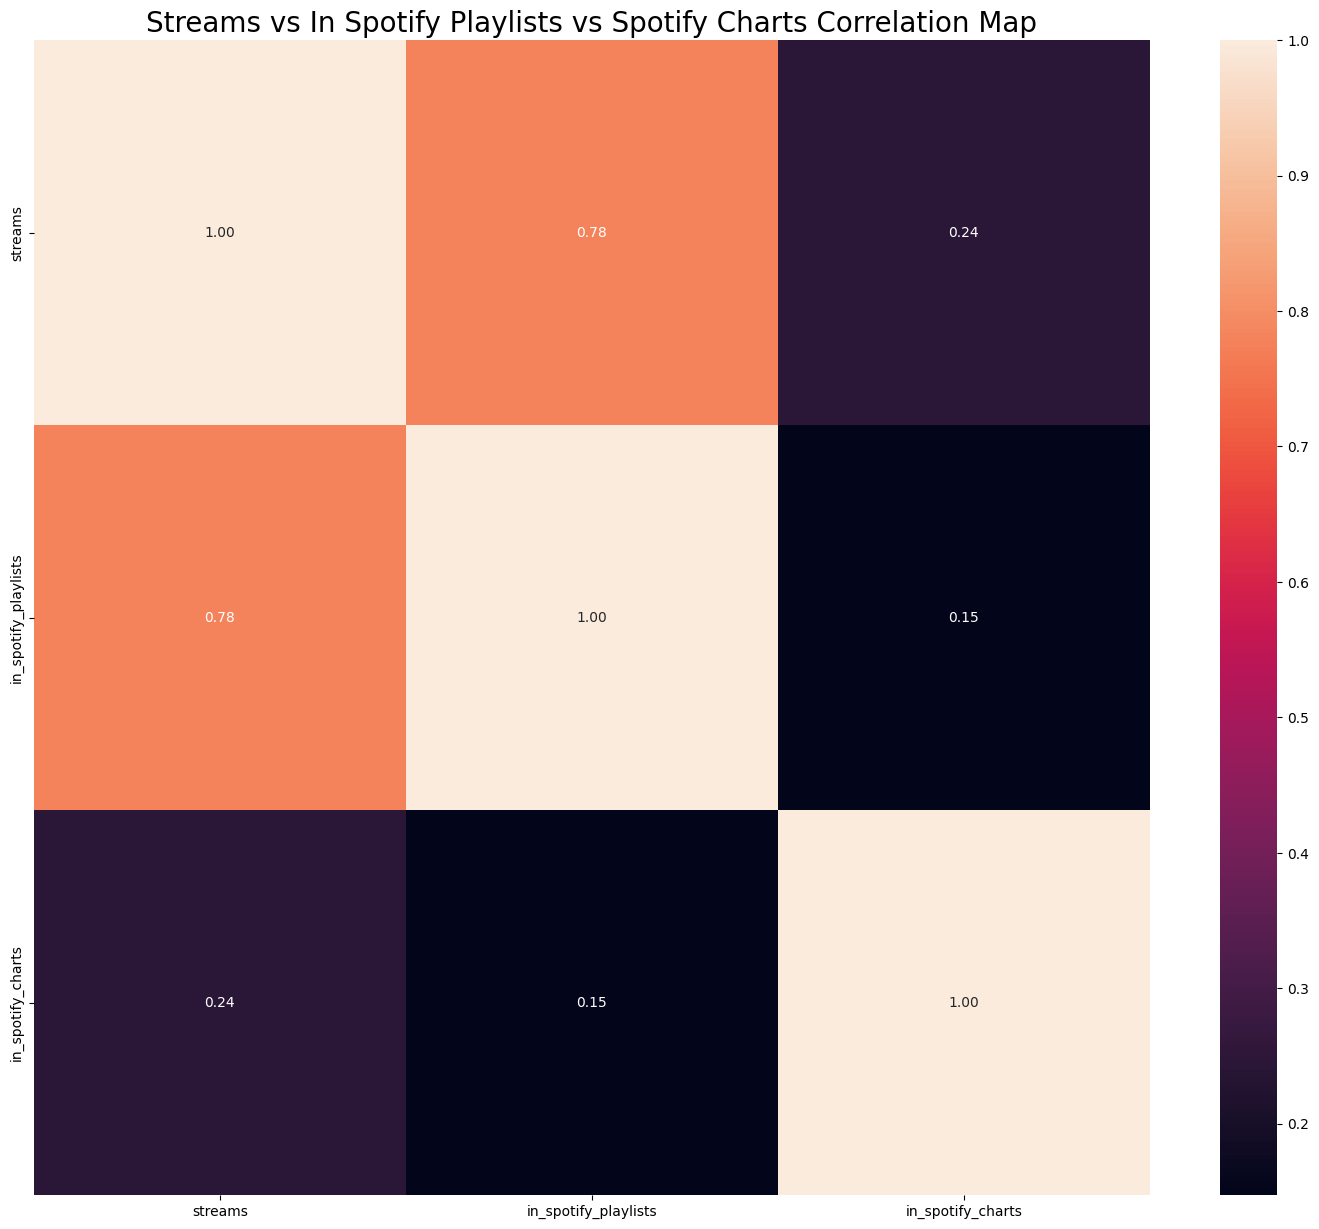

In [ ]:
plt.figure(figsize=(18,15))

# Let's do a heatmap correlation of the dataframe and use 2 decimal places for the correlation ratio
sns.heatmap(df[["streams", "in_spotify_playlists", "in_spotify_charts"]].corr(numeric_only = True),annot=True,fmt='.2f')

# Let's give it a title
plt.title('Streams vs In Spotify Playlists vs Spotify Charts Correlation Map', size = 20)

# Finally, plot the heatmap
plt.show()

There is a strong positive correlation between streams and in spotify playlist. Hence, a track is likely to have more streams if it is present in many playlist.

However, there is a weak correlation between in spotify charts to in spotify playlist and streams.

* in_spotify_charts: Presence and rank of the song on Spotify charts

As of now, there is no clear what this data is representing. I am gonna assume that this is the number of spotify charts where a track had showed up.

Hence, there is minimal influence of both streams and number of playlist on a track showing up in spotify charts. However, this result is unexpected as amount of streams should have influence on a track showing up in a charts. A factor in mind why is this the case is the charts for each countries. A track may not be present in charts of many countries but still receive massive streams from few countries with big Spotify users. We say, there's still a possibility that a track not known globally can gain more streams that those known globally.

### Top 20 tracks vs Month released
Let's look on released month of **Top 20 tracks**.

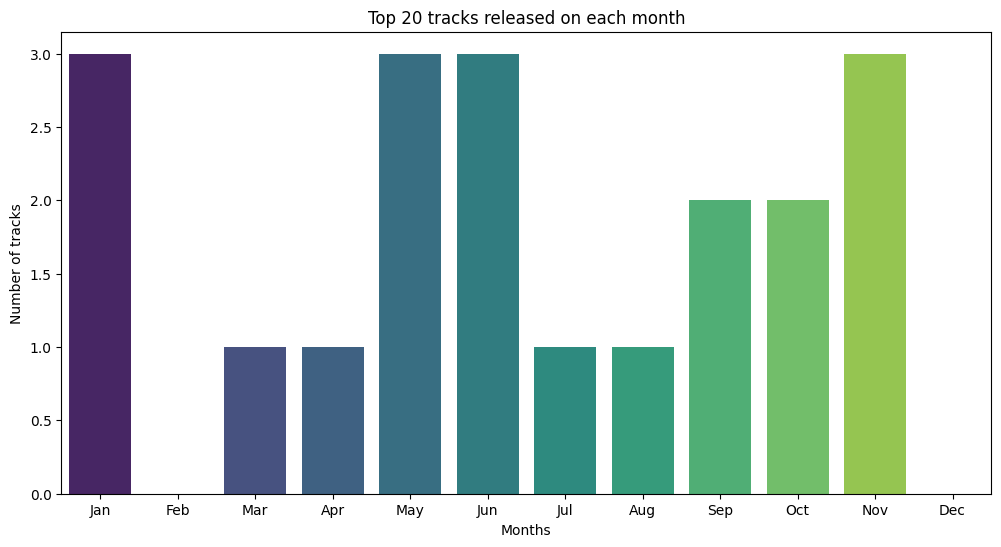

In [ ]:
top_20 = df[['track_name', 'streams', 'released_month']].drop_duplicates(keep='first').sort_values(by='streams', ascending=False).head(20)
y = top_20.groupby("released_month")["released_month"].count().tolist()

#Since there is no released tracks on month of February and December, put in value of 0 in place
y.insert(1, 0)
y.insert(11,0)

plt.figure(figsize=(12, 6))
sns.barplot(x=x, y=y, palette='viridis')
plt.xlabel('Months')
plt.ylabel('Number of tracks')
plt.title('Top 20 tracks released on each month')
plt.xticks(rotation=0)
plt.show()

We see here that the months of Jan, May, Jun, and Nov are the months with most tracks released (3) from Top 20 tracks. We may say, that these months are a good time for releasing music. However, further investigation is needed as there are other factors affecting the number of streams of a track such as promotion, visibility etc.

### Audio features
Let's create heatmap for the the audio features of a track (danceability, valence, energy, acoustic, instrumental, liveness, speechiness)

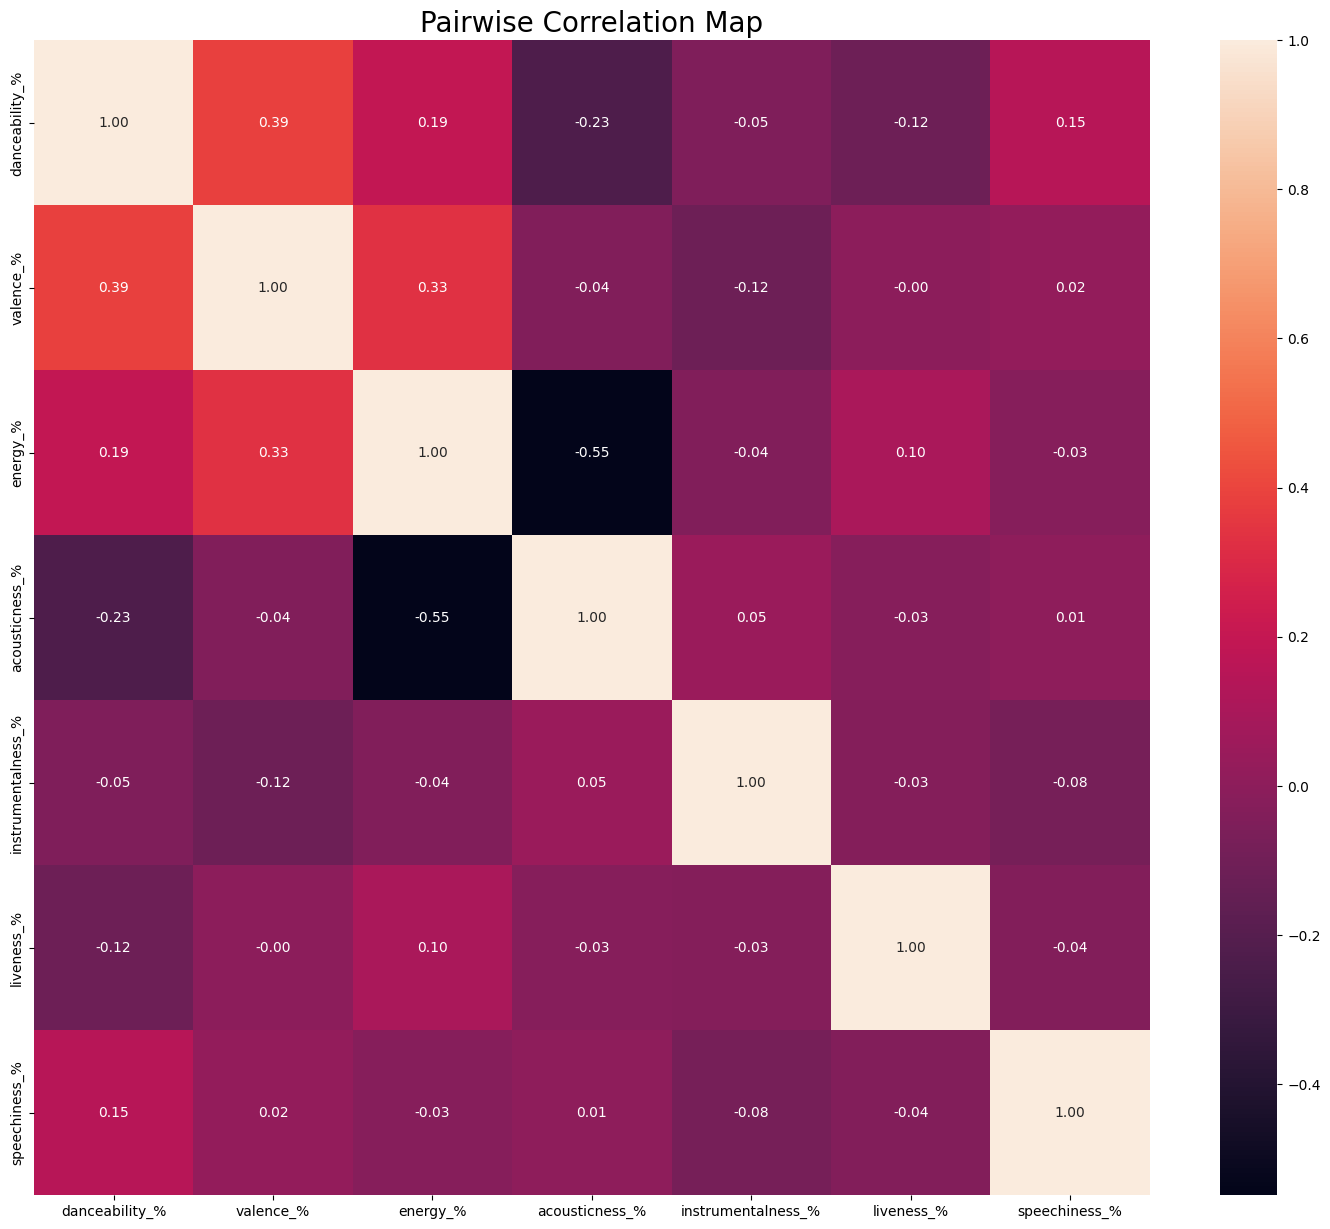

In [ ]:
plt.figure(figsize=(18,15))

# Let's do a heatmap correlation of the tracks audio features and use 2 decimal places for the correlation ratio
sns.heatmap(df.iloc[:,-7:].corr(numeric_only = True),annot=True,fmt='.2f')

# Let's give it a title
plt.title('Pairwise Correlation Map', size = 20)

# Finally, plot the heatmap
plt.show()

## Findings
Here are the notable findings on the analysis of Top Spotify song in 2023.

* The track that has the most streams in 2023 is Blinding Light.
* The artist that gained the most cummulative streams across performed tracks is The Weeknd.
*  Majority of the top songs are in Major mode, means most top songs have lighter, brighter, cheerier sounds.
* Most of the top 2023 tracks are release on months of January, May, and June.
* A track is likely to have more streams if it is present in many playlist.
* A track not known globally has a possibility to gain more streams than tracks that are known globally.